In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [2]:
def rename (dataset_1,dataset_2,dataset_3):
    nn_1 = []
    lt_1 = list(dataset_1)
    for i in range(len(lt_1)):
        nn_1.append(lt_1[i]+'_1')
    dataset_1.columns = nn_1
    nn_2 = []
    lt_2 = list(dataset_2)
    for i in range(len(lt_2)):
        nn_2.append(lt_2[i]+'_2')
    dataset_2.columns = nn_2
    nn_3 = []
    lt_3 = list(dataset_3)
    for i in range(len(lt_3)):
        nn_3.append(lt_3[i]+'_3')
    dataset_3.columns = nn_3

In [3]:
def star_end(i):
    path = sector+':/openpose_data/揮手測試/'+i+'/標記.txt'
    f = open(path, 'r')
    #print(f.read())
    l = f.read().split()
    f.close()
    return(int(l[0][5:]),int(l[11][4:]))

In [42]:
def values (dataset):
    dataset['rl_wave'] = dataset['wave']
    dataset= dataset.drop(['wave'],axis=1)
    values = dataset.values #数值特征变量
    # convert series to supervised learning
    def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
        n_vars = 1 if type(data) is list else data.shape[1]
        df = pd.DataFrame(data)
        cols, names = list(), list()
        # input sequence (t-n, ... t-1)
        for i in range(n_in, 0, -1):
            cols.append(df.shift(i))
            names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        # forecast sequence (t, t+1, ... t+n)
        for i in range(0, n_out):
            cols.append(df.shift(-i))
            if i == 0:
                names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
            else:
                names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
        # put it all together
        agg = pd.concat(cols, axis=1)
        agg.columns = names
        # drop rows with NaN values
        if dropnan:
            agg.dropna(inplace=True)
        return agg
    # ensure all data is float
    values = values.astype('float32')
    # normalize features 歸一化
    ''''''
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled = scaler.fit_transform(values)
    
    # frame as supervised learning
    reframed = series_to_supervised(scaled, 1, 1)
    
    #reframed = series_to_supervised(values, 1, 1)
    # drop columns we don't want to predict
    reframed.drop(reframed.columns[[range(len(list(dataset)),len(list(dataset))*2)]], axis=1, inplace=True)
    
    # split into train and test sets
    values = reframed.values
    # n_train_hours = int(len(values)*0.7)
    # train = values[:n_train_hours, :]
    # test = values[n_train_hours:, :]
    # split into input and outputs
    # train_X, train_y = train[:,:-1], train[:, -1]
    test_X, test_y = values[:, :-1], values[:, -1]
    # reshape input to be 3D [samples, timesteps, features]
    # train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
    test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
    #print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
    return(test_X,test_y)
    

In [4]:
fn = ['額外測試']#,'起立蹲下'
sector = 'D'
for i in fn:
    dataset_0 = pd.read_csv(sector+':/openpose_data/揮手測試/'+i+'/骨架資訊_all_標記.csv')#, header= None) 
    dataset_1 = pd.read_csv(sector+':/openpose_data/揮手測試/'+i+'/骨架測試_相關距離.csv') 
    dataset_2 = pd.read_csv(sector+':/openpose_data/揮手測試/'+i+'/骨架測試_移動距離.csv') 
    dataset_3 = pd.read_csv(sector+':/openpose_data/揮手測試/'+i+'/骨架測試_關節角度(左右手).csv') 
    dataset_4 = pd.read_csv(sector+':/openpose_data/揮手測試/'+i+'/骨架測試_關節向量(左右手).csv') 
    rename(dataset_1,dataset_2,dataset_3)
    locals()['dataset_'+str(i)] = pd.concat([dataset_0,dataset_1,dataset_2,dataset_3,dataset_4],axis= 1).dropna(axis=0)#
    #locals()['dataset_'+str(i)] = pd.concat([dataset_0,dataset_1,dataset_2],axis= 1).dropna(axis=0)
    star , end = star_end(i)
    print(star , end)
    locals()['dataset_'+str(i)] = locals()['dataset_'+str(i)][star:end]

50 900


In [44]:
fn = ['額外測試']#,'起立蹲下'
number = 2
for i in fn:
    dataset_0 = pd.read_csv(sector+':/openpose_data/揮手測試/'+i+'/骨架資訊_all_標記.csv')#, header= None) 
    dataset_1 = pd.read_csv(sector+':/openpose_data/揮手測試/'+i+'/骨架測試_相關距離.csv') 
    dataset_2 = pd.read_csv(sector+':/openpose_data/揮手測試/'+i+'/骨架測試_移動距離.csv') 
    dataset_3 = pd.read_csv(sector+':/openpose_data/揮手測試/'+i+'/骨架測試_關節角度(左右手).csv') 
    dataset_4 = pd.read_csv(sector+':/openpose_data/揮手測試/'+i+'/骨架測試_關節向量(左右手).csv') 
    rename(dataset_1,dataset_2,dataset_3)
    locals()['dataset_'+str(i)] = pd.concat([dataset_0,dataset_1,dataset_2,dataset_3,dataset_4],axis= 1).dropna(axis=0)
    star , end = star_end(i)
    print(star , end)
    locals()['dataset_'+str(i)] = locals()['dataset_'+str(i)][star:end]
    locals()['test_X_'+str(i)] ,locals()['test_y_'+str(i)] = values(locals()['dataset_'+str(i)])#.iloc[:,75:]
    locals()['test_y_'+str(i)][locals()['test_y_'+str(i)] ==1] = number
    print(number)
    number = number+1


    # tes_X.append(locals()['test_X_'+str(i)])
    # tes_y.append(locals()['test_y_'+str(i)])

    

    print('測試資料 : ',len(locals()['test_y_'+str(i)]))

50 900
2
測試資料 :  849


C:\Users\DodoLu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\indexes\base.py:5055: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


In [45]:
dataset = locals()['dataset_'+str(i)]
values = dataset.values #数值特征变量
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
# ensure all data is float
values = values.astype('float32')
# normalize features 歸一化
''''''
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[range(len(list(dataset)),len(list(dataset))*2)]], axis=1, inplace=True)

# split into train and test sets
values = reframed.values
test_test = values.reshape((values.shape[0], 1, values.shape[1]))
print('多動作測試資料')


多動作測試資料


C:\Users\DodoLu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\indexes\base.py:5055: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


In [46]:
def fiveway(arr):
    # 将五个状态的元素分别设为 1、2、3、4、5
    arr_states = np.zeros((len(arr), 5), dtype=int) ##
    for i in range(1, 6): ##
        arr_states[:, i-1][arr == i] = 1
        
    # 使用卷积操作查找连续的五个相同的元素
    nb = 5 ##
    kernel = np.ones(nb)
    result_states = np.apply_along_axis(lambda x: np.convolve(x, kernel, mode='same'), axis=0, arr=arr_states)


    # 将大于等于 5 的元素视为当前状态，其他元素视为 0
    result_states[result_states < nb] = 0
    idx = np.where(result_states >= nb)

    # 使用布尔索引找到对应的行和列
    row_idx = idx[0]
    col_idx = idx[1]

    # 将值为 5 的位置改成对应的列号
    result_states[row_idx, col_idx] = col_idx + 1

    # 将所有状态的结果相加得到总结果
    result = np.sum(result_states, axis=1)

    # 输出结果
    return(result)

In [47]:
def show_conf_mat(cm):  #可視化混淆矩陣
    # 定义类别数量
    num_classes = cm.shape[0]

    # 生成类别标签
    #labels = ["Class {}".format(i+1) for i in range(num_classes)]
    labels = ['normal','wave RH to R','wave RH to L','wave LH to R','wave LH to L','circle RH to R','circle RH to L','circle LH to R','circle LH to L','kick R','kick L']
    
    #
    plt.figure(figsize=(10, 6))
    
    # 使用Seaborn來可視化混淆矩陣
    sns.set(font_scale=1.5)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)

    # 添加標題和軸標籤
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

    # 顯示可視化結果
    plt.show()
    
def showreport(report):  #可視化混淆矩陣數值
    # 将report转换为DataFrame格式
    df = pd.DataFrame(report).transpose()

    # 为DataFrame添加列名
    df.columns = ['precision', 'recall', 'f1-score', 'support']
    
    df['CLASS'] = ['normal','wave RH to R','wave RH to L','wave LH to R','wave LH to L','circle RH to R','circle RH to L','circle LH to R','circle LH to L','kick R','kick L'
                 ,'accuracy','macro avg','weighted avg']
    df.set_index('CLASS', inplace=True) 
    ax = df.iloc[1:-3,:-1].plot.bar(rot=90)#rot表示xstick旋轉的角度
    ax.legend(bbox_to_anchor=(1.1, 1.2),ncol=3)
    print(df)
    
    # Export DataFrame to Excel
    df.to_excel('classification_report'+str(epochs)+'.xlsx', index=True)
    # 显示图形
    plt.show()
    
def show(y_true,y_pred):  #計算混淆矩陣及其相關評估數值
    # 计算混淆矩阵和分类报告
    conf_mat = confusion_matrix(y_true, y_pred)
    #report = classification_report(y_true, y_pred)
    report1 = classification_report(y_true, y_pred, output_dict=True)

    print(conf_mat)
    show_conf_mat(conf_mat)
    showreport(report1)

In [35]:
from tensorflow.keras.models import load_model
epochs_test = 50
testmodel = load_model('./model/lstm-Epoch'+str(epochs_test)+'.h5')

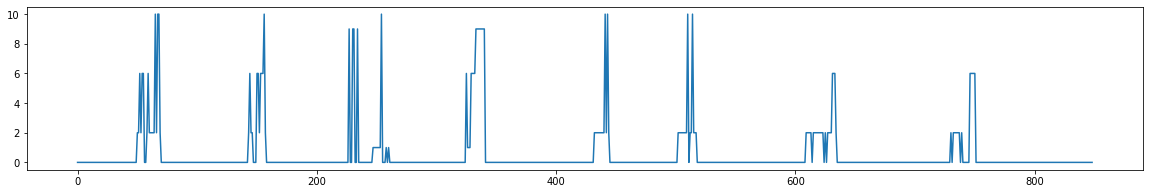

In [48]:
yhat = testmodel.predict(test_X_額外測試)

# 將概率最大的元素作為預測類別
predicted_labels = np.argmax(yhat, axis=1)

#rmse = math.sqrt(mean_squared_error(predicted_labels, test_y))

# 計算分類器的準確率
#accuracy = accuracy_score(y_test, predicted_labels)
#print("分類器的準確率為：", accuracy)

# 計算分類器的错误数量
#error_count = np.count_nonzero(y_test != predicted_labels)
#print("分類器的錯誤筆數為：", error_count)

#print('Test RMSE: %.3f' % rmse)
plt.figure(figsize=(20, 3))
plt.plot(predicted_labels)
#plt.plot(test_y)
#plt.axhline(y=3,color = 'red' , linestyle="-.")
plt.show()

分類器的準確率為： 0.5288574793875147
分類器的錯誤筆數為： 400
Test RMSE: 1.369


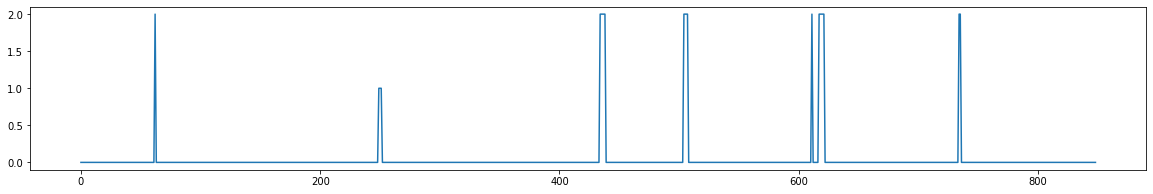

In [50]:
# print(grid_result,'\n epochs:',epochs_test)# softmax
yhat = testmodel.predict(test_X_額外測試)

# 將概率最大的元素作為預測類別
predicted_labels = np.argmax(yhat, axis=1)
predicted_labels_5 = fiveway(predicted_labels)
y_test_5 = fiveway(test_y_額外測試)

rmse = math.sqrt(mean_squared_error(predicted_labels_5, y_test_5))

# 計算分類器的準確率
accuracy = accuracy_score(y_test_5, predicted_labels_5)
print("分類器的準確率為：", accuracy)

# 計算分類器的错误数量
error_count = np.count_nonzero(y_test_5 != predicted_labels_5)
print("分類器的錯誤筆數為：", error_count)

print('Test RMSE: %.3f' % rmse)
plt.figure(figsize=(20, 3))
plt.plot(predicted_labels_5)
# plt.plot(y_test_5)
plt.show()


In [ ]:
show(y_test, predicted_labels)